In [ ]:
# https://drive.google.com/file/d/1ugszR_wG8B04HRzk5_wqWB-uHoxNbgfd/view?usp=sharing - google drive link
# Download the file using gdown
!gdown --id 1ugszR_wG8B04HRzk5_wqWB-uHoxNbgfd

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ugszR_wG8B04HRzk5_wqWB-uHoxNbgfd
From (redirected): https://drive.google.com/uc?id=1ugszR_wG8B04HRzk5_wqWB-uHoxNbgfd&confirm=t&uuid=5e5b3d98-5733-4e61-8c5d-bd8fbf7b7e45
To: /content/validation_depth_8bit_3ch.zip
100% 103M/103M [00:02<00:00, 39.5MB/s] 


In [ ]:
!unzip validation_depth_8bit_3ch.zip

Streaming output truncated to the last 5000 lines.
  inflating: validation_depth_8bit_3ch/tomato/tomato_6_2_226_depthcrop.png  
  inflating: __MACOSX/validation_depth_8bit_3ch/tomato/._tomato_6_2_226_depthcrop.png  
  inflating: validation_depth_8bit_3ch/tomato/tomato_8_1_226_depthcrop.png  
  inflating: __MACOSX/validation_depth_8bit_3ch/tomato/._tomato_8_1_226_depthcrop.png  
  inflating: validation_depth_8bit_3ch/tomato/tomato_8_1_231_depthcrop.png  
  inflating: __MACOSX/validation_depth_8bit_3ch/tomato/._tomato_8_1_231_depthcrop.png  
  inflating: validation_depth_8bit_3ch/tomato/tomato_2_1_201_depthcrop.png  
  inflating: __MACOSX/validation_depth_8bit_3ch/tomato/._tomato_2_1_201_depthcrop.png  
  inflating: validation_depth_8bit_3ch/tomato/tomato_8_2_6_depthcrop.png  
  inflating: __MACOSX/validation_depth_8bit_3ch/tomato/._tomato_8_2_6_depthcrop.png  
  inflating: validation_depth_8bit_3ch/tomato/tomato_2_1_1_depthcrop.png  
  inflating: __MACOSX/validation_depth_8bit_3ch/tomat

In [ ]:
!pip install torchvision tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
from torchvision import datasets, transforms, models
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torch.optim import Adam
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Reproducibility
SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)

# 2. Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3. Transforms
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    # transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9,1.1)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],  # imagenet mean and std
    #                      std=[0.229, 0.224, 0.225])
    transforms.Normalize(mean=[0.3762, 0.3762, 0.3762],  # our dataset mean/std
                         std=[0.2760, 0.2760, 0.2760])
])


val_transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.3762, 0.3762, 0.3762],
                         std=[0.2760, 0.2760, 0.2760])
])

In [ ]:
# 4. Load dataset and split indices
data_dir = 'validation_depth_8bit_3ch'
full_dataset = datasets.ImageFolder(root=data_dir)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Get shuffled indices for reproducibility
indices = list(range(len(full_dataset)))
random.shuffle(indices)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

#5. Split using Subset
train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
val_dataset = torch.utils.data.Subset(full_dataset, val_indices)

# 6. Assign transforms afterwards
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

In [ ]:
# Print dimensions of a few images from the training set
print("\nTraining set image dimensions:")
for images, labels in train_loader:
    for i, img in enumerate(images[:2]):  # Print dimensions of the first 2 images
        print(f"Image {i + 1} dimensions: {img.shape}")
    break  # Exit after processing the first batch

# Print dimensions of a few images from the validation set
print("\nValidation set image dimensions:")
for images, labels in val_loader:
    for i, img in enumerate(images[:2]):  # Print dimensions of the first 2 images
        print(f"Image {i + 1} dimensions: {img.shape}")
    break  # Exit after processing the first batch

    # Get size of train and validation sets
train_size = len(train_dataset)
val_size = len(val_dataset)

print(f"Training set size: {train_size:,}")
print(f"Validation set size: {val_size:,}")


Training set image dimensions:
Image 1 dimensions: torch.Size([3, 224, 224])
Image 2 dimensions: torch.Size([3, 224, 224])

Validation set image dimensions:
Image 1 dimensions: torch.Size([3, 224, 224])
Image 2 dimensions: torch.Size([3, 224, 224])
Training set size: 33,501
Validation set size: 8,376


In [ ]:
import torch.nn as nn
from torchvision import models

# Load pretrained VGG19
weights = models.VGG19_Weights.DEFAULT
model = models.vgg19(weights=weights)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze classifier layers
for param in model.classifier.parameters():
    param.requires_grad = True

# Unfreeze the last convolutional block (Block 5: features[29:])
for param in model.features[29:].parameters():
    param.requires_grad = True

# Replace the classifier
num_ftrs = model.classifier[0].in_features

model.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 51)
)

model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# Print the number of trainable and frozen parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Frozen parameters: {frozen_params:,}")

Total parameters: 32,942,195
Trainable parameters: 19,997,235
Frozen parameters: 12,944,960


In [ ]:
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-5,
    weight_decay=1e-4  # L2 regularization
)
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)

In [ ]:
num_epochs = 20

train_loss_list = []
val_loss_list = []
train_top1_list = []
train_top5_list = []
val_top1_list = []
val_top5_list = []

best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_top1 = 0
    correct_top5 = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        # Top-1
        _, predicted = torch.max(outputs.data, 1)
        correct_top1 += (predicted == labels).sum().item()

        # Top-5
        top5_preds = torch.topk(outputs, 5, dim=1).indices
        correct_top5 += sum([labels[i] in top5_preds[i] for i in range(labels.size(0))])

        total_train += labels.size(0)

    train_top1_acc = correct_top1 / total_train * 100
    train_top5_acc = correct_top5 / total_train * 100
    avg_train_loss = train_loss / total_train

    train_loss_list.append(avg_train_loss)
    train_top1_list.append(train_top1_acc)
    train_top5_list.append(train_top5_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_top1 = 0
    correct_top5 = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            # Top-1
            _, predicted = torch.max(outputs.data, 1)
            correct_top1 += (predicted == labels).sum().item()

            # Top-5
            top5_preds = torch.topk(outputs, 5, dim=1).indices
            correct_top5 += sum([labels[i] in top5_preds[i] for i in range(labels.size(0))])

            total_val += labels.size(0)

    val_top1_acc = correct_top1 / total_val * 100
    val_top5_acc = correct_top5 / total_val * 100
    avg_val_loss = val_loss / total_val

    val_loss_list.append(avg_val_loss)
    val_top1_list.append(val_top1_acc)
    val_top5_list.append(val_top5_acc)

    # Scheduler step
    scheduler.step(val_top1_acc)

    print(f"Epoch {epoch + 1}")
    print(f"Top-1 Train Accuracy: {train_top1_acc:.2f}% --- Train Loss: {avg_train_loss:.4f}  |  Top-5 Train Accuracy: {train_top5_acc:.2f}%")
    print(f"Top-1 Val Accuracy:   {val_top1_acc:.2f}% --- Val Loss:   {avg_val_loss:.4f}  |  Top-5 Val Accuracy:   {val_top5_acc:.2f}%\n")

    # Save best model
    if val_top1_acc > best_val_accuracy:
        best_val_accuracy = val_top1_acc
        torch.save(model.state_dict(), 'best_model.pth')

print("Training Complete!")

Epoch 1
Top-1 Train Accuracy: 34.28% --- Train Loss: 2.5507  |  Top-5 Train Accuracy: 62.83%
Top-1 Val Accuracy:   65.76% --- Val Loss:   1.2959  |  Top-5 Val Accuracy:   89.90%



Epoch 2
Top-1 Train Accuracy: 56.79% --- Train Loss: 1.5561  |  Top-5 Train Accuracy: 84.64%
Top-1 Val Accuracy:   75.14% --- Val Loss:   0.8915  |  Top-5 Val Accuracy:   95.06%



Epoch 3
Top-1 Train Accuracy: 65.41% --- Train Loss: 1.2189  |  Top-5 Train Accuracy: 89.70%
Top-1 Val Accuracy:   79.67% --- Val Loss:   0.7146  |  Top-5 Val Accuracy:   97.02%



Epoch 4
Top-1 Train Accuracy: 70.38% --- Train Loss: 1.0094  |  Top-5 Train Accuracy: 92.87%
Top-1 Val Accuracy:   82.19% --- Val Loss:   0.5892  |  Top-5 Val Accuracy:   97.66%



Epoch 5
Top-1 Train Accuracy: 74.13% --- Train Loss: 0.8730  |  Top-5 Train Accuracy: 94.38%
Top-1 Val Accuracy:   85.28% --- Val Loss:   0.5213  |  Top-5 Val Accuracy:   98.17%



Epoch 6
Top-1 Train Accuracy: 76.96% --- Train Loss: 0.7649  |  Top-5 Train Accuracy: 95.65%
Top-1 Val Accuracy:   86.03% --- Val Loss:   0.4704  |  Top-5 Val Accuracy:   98.46%



Epoch 7
Top-1 Train Accuracy: 79.11% --- Train Loss: 0.6836  |  Top-5 Train Accuracy: 96.44%
Top-1 Val Accuracy:   87.07% --- Val Loss:   0.4256  |  Top-5 Val Accuracy:   98.60%



Epoch 8
Top-1 Train Accuracy: 81.43% --- Train Loss: 0.6044  |  Top-5 Train Accuracy: 97.16%
Top-1 Val Accuracy:   87.86% --- Val Loss:   0.3907  |  Top-5 Val Accuracy:   98.97%



Epoch 9
Top-1 Train Accuracy: 82.87% --- Train Loss: 0.5546  |  Top-5 Train Accuracy: 97.79%
Top-1 Val Accuracy:   88.57% --- Val Loss:   0.3715  |  Top-5 Val Accuracy:   99.04%



Epoch 10
Top-1 Train Accuracy: 84.04% --- Train Loss: 0.5138  |  Top-5 Train Accuracy: 97.90%
Top-1 Val Accuracy:   89.61% --- Val Loss:   0.3464  |  Top-5 Val Accuracy:   99.06%



Epoch 11
Top-1 Train Accuracy: 85.29% --- Train Loss: 0.4692  |  Top-5 Train Accuracy: 98.23%
Top-1 Val Accuracy:   89.97% --- Val Loss:   0.3220  |  Top-5 Val Accuracy:   99.07%



Epoch 12
Top-1 Train Accuracy: 86.45% --- Train Loss: 0.4318  |  Top-5 Train Accuracy: 98.49%
Top-1 Val Accuracy:   90.22% --- Val Loss:   0.3239  |  Top-5 Val Accuracy:   99.18%



Epoch 13
Top-1 Train Accuracy: 87.61% --- Train Loss: 0.3929  |  Top-5 Train Accuracy: 98.79%
Top-1 Val Accuracy:   90.46% --- Val Loss:   0.2979  |  Top-5 Val Accuracy:   99.26%



Epoch 14
Top-1 Train Accuracy: 88.22% --- Train Loss: 0.3706  |  Top-5 Train Accuracy: 98.95%
Top-1 Val Accuracy:   91.36% --- Val Loss:   0.2822  |  Top-5 Val Accuracy:   99.43%



Epoch 15
Top-1 Train Accuracy: 89.46% --- Train Loss: 0.3378  |  Top-5 Train Accuracy: 99.04%
Top-1 Val Accuracy:   91.56% --- Val Loss:   0.2706  |  Top-5 Val Accuracy:   99.34%



Epoch 16
Top-1 Train Accuracy: 89.72% --- Train Loss: 0.3185  |  Top-5 Train Accuracy: 99.18%
Top-1 Val Accuracy:   91.40% --- Val Loss:   0.2706  |  Top-5 Val Accuracy:   99.41%



Epoch 17
Top-1 Train Accuracy: 90.38% --- Train Loss: 0.2991  |  Top-5 Train Accuracy: 99.27%
Top-1 Val Accuracy:   92.02% --- Val Loss:   0.2569  |  Top-5 Val Accuracy:   99.41%



Epoch 18
Top-1 Train Accuracy: 91.13% --- Train Loss: 0.2778  |  Top-5 Train Accuracy: 99.44%
Top-1 Val Accuracy:   91.76% --- Val Loss:   0.2538  |  Top-5 Val Accuracy:   99.56%



Epoch 19
Top-1 Train Accuracy: 91.60% --- Train Loss: 0.2610  |  Top-5 Train Accuracy: 99.48%
Top-1 Val Accuracy:   92.10% --- Val Loss:   0.2478  |  Top-5 Val Accuracy:   99.52%



Epoch 20
Top-1 Train Accuracy: 92.29% --- Train Loss: 0.2410  |  Top-5 Train Accuracy: 99.53%
Top-1 Val Accuracy:   92.23% --- Val Loss:   0.2390  |  Top-5 Val Accuracy:   99.61%

Training Complete!


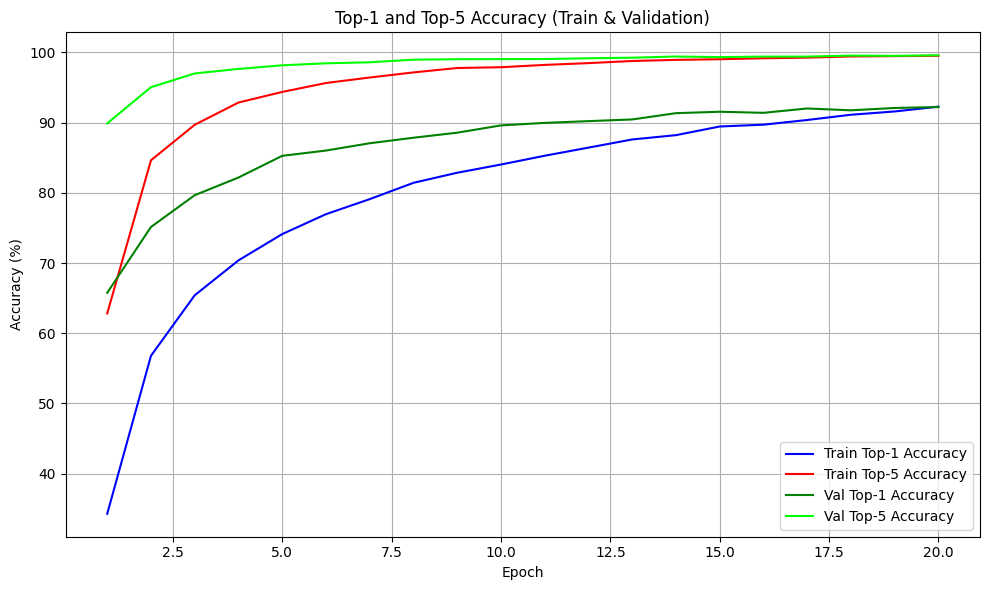

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_top1_list, label='Train Top-1 Accuracy', color='blue')
plt.plot(epochs, train_top5_list, label='Train Top-5 Accuracy', color='red')
plt.plot(epochs, val_top1_list, label='Val Top-1 Accuracy', color='green')
plt.plot(epochs, val_top5_list, label='Val Top-5 Accuracy', color='lime')

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Top-1 and Top-5 Accuracy (Train & Validation)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

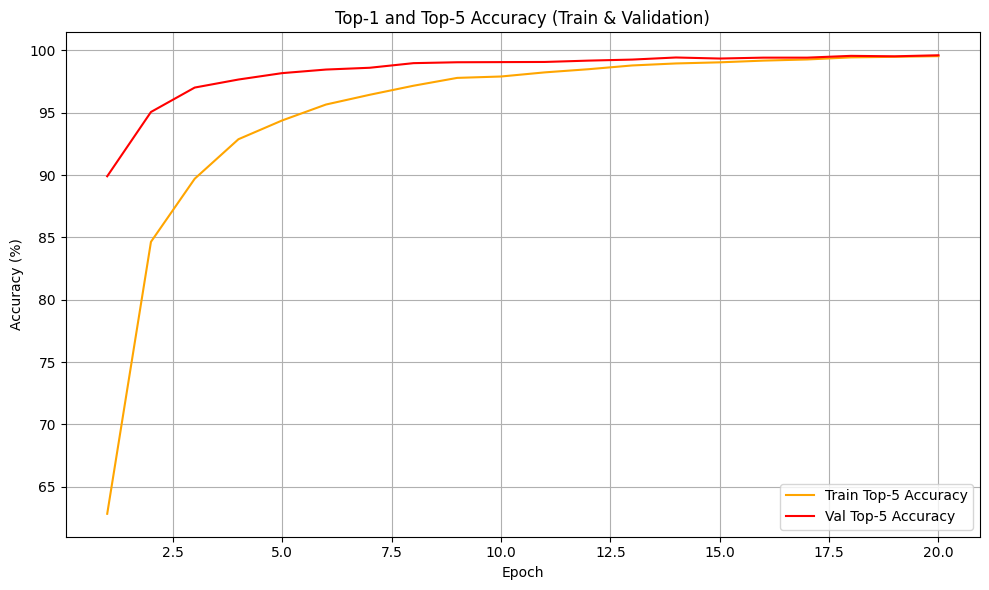

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_top1_list, label='Train Top-1 Accuracy', color='blue')
plt.plot(epochs, train_top5_list, label='Train Top-5 Accuracy', color='orange')
# plt.plot(epochs, val_top1_list, label='Val Top-1 Accuracy', color='green')
plt.plot(epochs, val_top5_list, label='Val Top-5 Accuracy', color='red')

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Top-1 and Top-5 Accuracy (Train & Validation)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()